# 📊 Red Wine Quality 데이터셋 소개

## 데이터셋 개요
| 항목 | 내용 |
|------|------|
| **출처** | UCI Machine Learning Repository |
| **제공** | Kaggle ([uciml/red-wine-quality-cortez-et-al-2009](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)) |
| **라이선스** | Open Database License (ODbL 1.0) |
| **파일 형식** | CSV |

## 데이터셋 설명
이 데이터셋은 포르투갈 "Vinho Verde" 레드 와인의 **물리화학적 특성**과 **관능 품질 평가** 데이터를 포함합니다. 프라이버시 및 물류 제한으로 인해 포도 품종, 브랜드, 가격 정보는 포함되어 있지 않습니다.

**특징:**
- **분류(Classification)** 및 **회귀(Regression)** 모두 가능
- 클래스 불균형 존재 (대부분 중간 품질, 극단적 품질은 적음)
- 이진 분류(Good/Bad)로 변환하여 분석 권장

---

## 입력 변수 (Input Variables) - 물리화학적 특성

| # | 변수명 | 설명 |
|---|--------|------|
| 1 | **fixed acidity** | 고정 산도 - 비휘발성 산(주석산 등)의 농도 (g/dm³) |
| 2 | **volatile acidity** | 휘발성 산도 - 아세트산 농도, 너무 높으면 식초 맛 발생 (g/dm³) |
| 3 | **citric acid** | 구연산 - 소량 첨가 시 신선함과 풍미 향상 (g/dm³) |
| 4 | **residual sugar** | 잔류 당분 - 발효 후 남은 당분, 45g/L 이상이면 단맛 와인 (g/dm³) |
| 5 | **chlorides** | 염화물 - 와인의 염분 함량 (g/dm³) |
| 6 | **free sulfur dioxide** | 유리 이산화황 - 미생물 성장 억제 및 산화 방지 (mg/dm³) |
| 7 | **total sulfur dioxide** | 총 이산화황 - 유리 및 결합 형태의 SO₂ 총합 (mg/dm³) |
| 8 | **density** | 밀도 - 알코올과 당분 함량에 따라 결정 (g/cm³) |
| 9 | **pH** | pH - 산성도 척도 (0=매우 산성 ~ 14=매우 염기성) |
| 10 | **sulphates** | 황산염 - 와인 첨가제, SO₂ 수준에 기여 (g/dm³) |
| 11 | **alcohol** | 알코올 - 와인의 알코올 함량 (% vol) |

---

## 출력 변수 (Target Variable)

| 변수명 | 설명 | 범위 |
|--------|------|------|
| **quality** | 관능 품질 점수 (소믈리에 평가) | 0 ~ 10 |

---

## 분석 접근 방법

### 1. 회귀 분석 (Regression)
- 품질 점수(0-10)를 연속형 변수로 예측

### 2. 분류 분석 (Classification)
품질 점수를 이진 변수로 변환:
- **Quality ≥ 6** → Good (1)
- **Quality < 6** → Bad (0)

> 💡 **참고**: Decision Tree 기반 알고리즘으로 약 **AUC 0.88** 달성 가능

---

## 인용 (Citation)
```
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties. 
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
```

---

# Red Wine Quality Analysis
## Regression & Classification 모델링

### 학습 목표
1. Kaggle API를 사용하여 데이터셋 다운로드
2. 탐색적 데이터 분석(EDA) 및 시각화
3. Regression 모델로 와인 품질 점수 예측
4. Classification 모델로 와인 품질 등급 분류
5. 모델 성능 평가 및 비교

### 데이터셋 정보
- **출처**: UCI Machine Learning Repository (Kaggle)
- **특성**: 11개의 물리화학적 특성 (산도, 당도, pH 등)
- **타겟**: quality (0-10 점수)

---
## 1. 환경 설정 및 Kaggle 데이터 다운로드

In [37]:
# 필요한 패키지 설치 (처음 한 번만 실행)
# !pip install kaggle pandas numpy matplotlib seaborn scikit-learn xgboost

In [38]:
from dotenv import load_dotenv
# .env로 부터 파일을 읽으면 True가 출력
print(load_dotenv())

True


In [39]:
import os
import zipfile

from kaggle.api.kaggle_api_extended import KaggleApi

# Kaggle API 인증
api = KaggleApi()
api.authenticate()

print("Kaggle API 인증 성공!")

Kaggle API 인증 성공!


In [40]:
# 데이터셋 다운로드
dataset_name = 'uciml/red-wine-quality-cortez-et-al-2009'
download_path = './data'

# 다운로드 폴더 생성
os.makedirs(download_path, exist_ok=True)

# 데이터셋 다운로드 및 압축 해제
api.dataset_download_files(dataset_name, path=download_path, unzip=True)

print(f"데이터셋 다운로드 완료: {download_path}")
print("다운로드된 파일:", os.listdir(download_path))

Dataset URL: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
데이터셋 다운로드 완료: ./data
다운로드된 파일: ['teenage_mental.xls', 'titanic', 'winequality-red.csv']


---
## 2. 라이브러리 임포트 및 데이터 로드

In [41]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 시각화 설정
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# 전처리 및 모델링
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score,
                             accuracy_score, classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, precision_recall_curve)

# Regression 모델
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Classification 모델
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

print("라이브러리 임포트 완료!")

라이브러리 임포트 완료!


In [42]:
# 데이터 로드
df = pd.read_csv('./data/winequality-red.csv')

print(f"데이터 크기: {df.shape}")
print(f"행: {df.shape[0]}, 열: {df.shape[1]}")
df.head()

데이터 크기: (1599, 12)
행: 1599, 열: 12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


---
## 3. 탐색적 데이터 분석 (EDA)

### 3.1 기본 정보 확인

In [43]:
# 데이터 정보
print("=" * 50)
print("데이터 타입 및 결측치")
print("=" * 50)
df.info()

데이터 타입 및 결측치
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [44]:
# 기술 통계량
print("\n기술 통계량:")
df.describe().round(3)


기술 통계량:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [45]:
# 결측치 확인
print("\n결측치 개수:")
print(df.isnull().sum())
print(f"\n전체 결측치: {df.isnull().sum().sum()}")


결측치 개수:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

전체 결측치: 0


In [46]:
# 중복 데이터 확인
duplicates = df.duplicated().sum()
print(f"중복 행 개수: {duplicates}")

# 중복 제거 (선택적)
# df = df.drop_duplicates()
# print(f"중복 제거 후 데이터 크기: {df.shape}")

중복 행 개수: 240


### 3.2 타겟 변수 (quality) 분석

품질 점수 분포:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


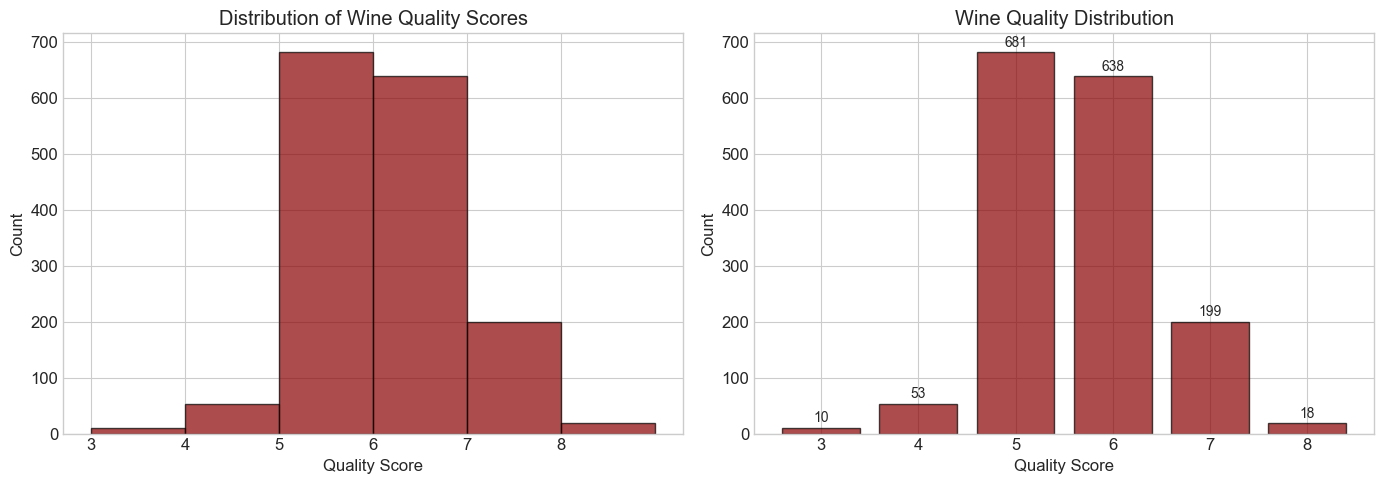


품질 점수 범위: 3 ~ 8
평균 품질: 5.64
중앙값: 6.0


In [47]:
# 품질 점수 분포
print("품질 점수 분포:")
print(df['quality'].value_counts().sort_index())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 히스토그램
axes[0].hist(df['quality'], bins=range(3, 10), edgecolor='black', alpha=0.7, color='darkred')
axes[0].set_xlabel('Quality Score')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Wine Quality Scores')
axes[0].set_xticks(range(3, 9))

# 막대 그래프
quality_counts = df['quality'].value_counts().sort_index()
bars = axes[1].bar(quality_counts.index, quality_counts.values, color='darkred', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Quality Score')
axes[1].set_ylabel('Count')
axes[1].set_title('Wine Quality Distribution')

# 막대 위에 값 표시
for bar, count in zip(bars, quality_counts.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                 str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n품질 점수 범위: {df['quality'].min()} ~ {df['quality'].max()}")
print(f"평균 품질: {df['quality'].mean():.2f}")
print(f"중앙값: {df['quality'].median()}")

### 3.3 특성 분포 시각화

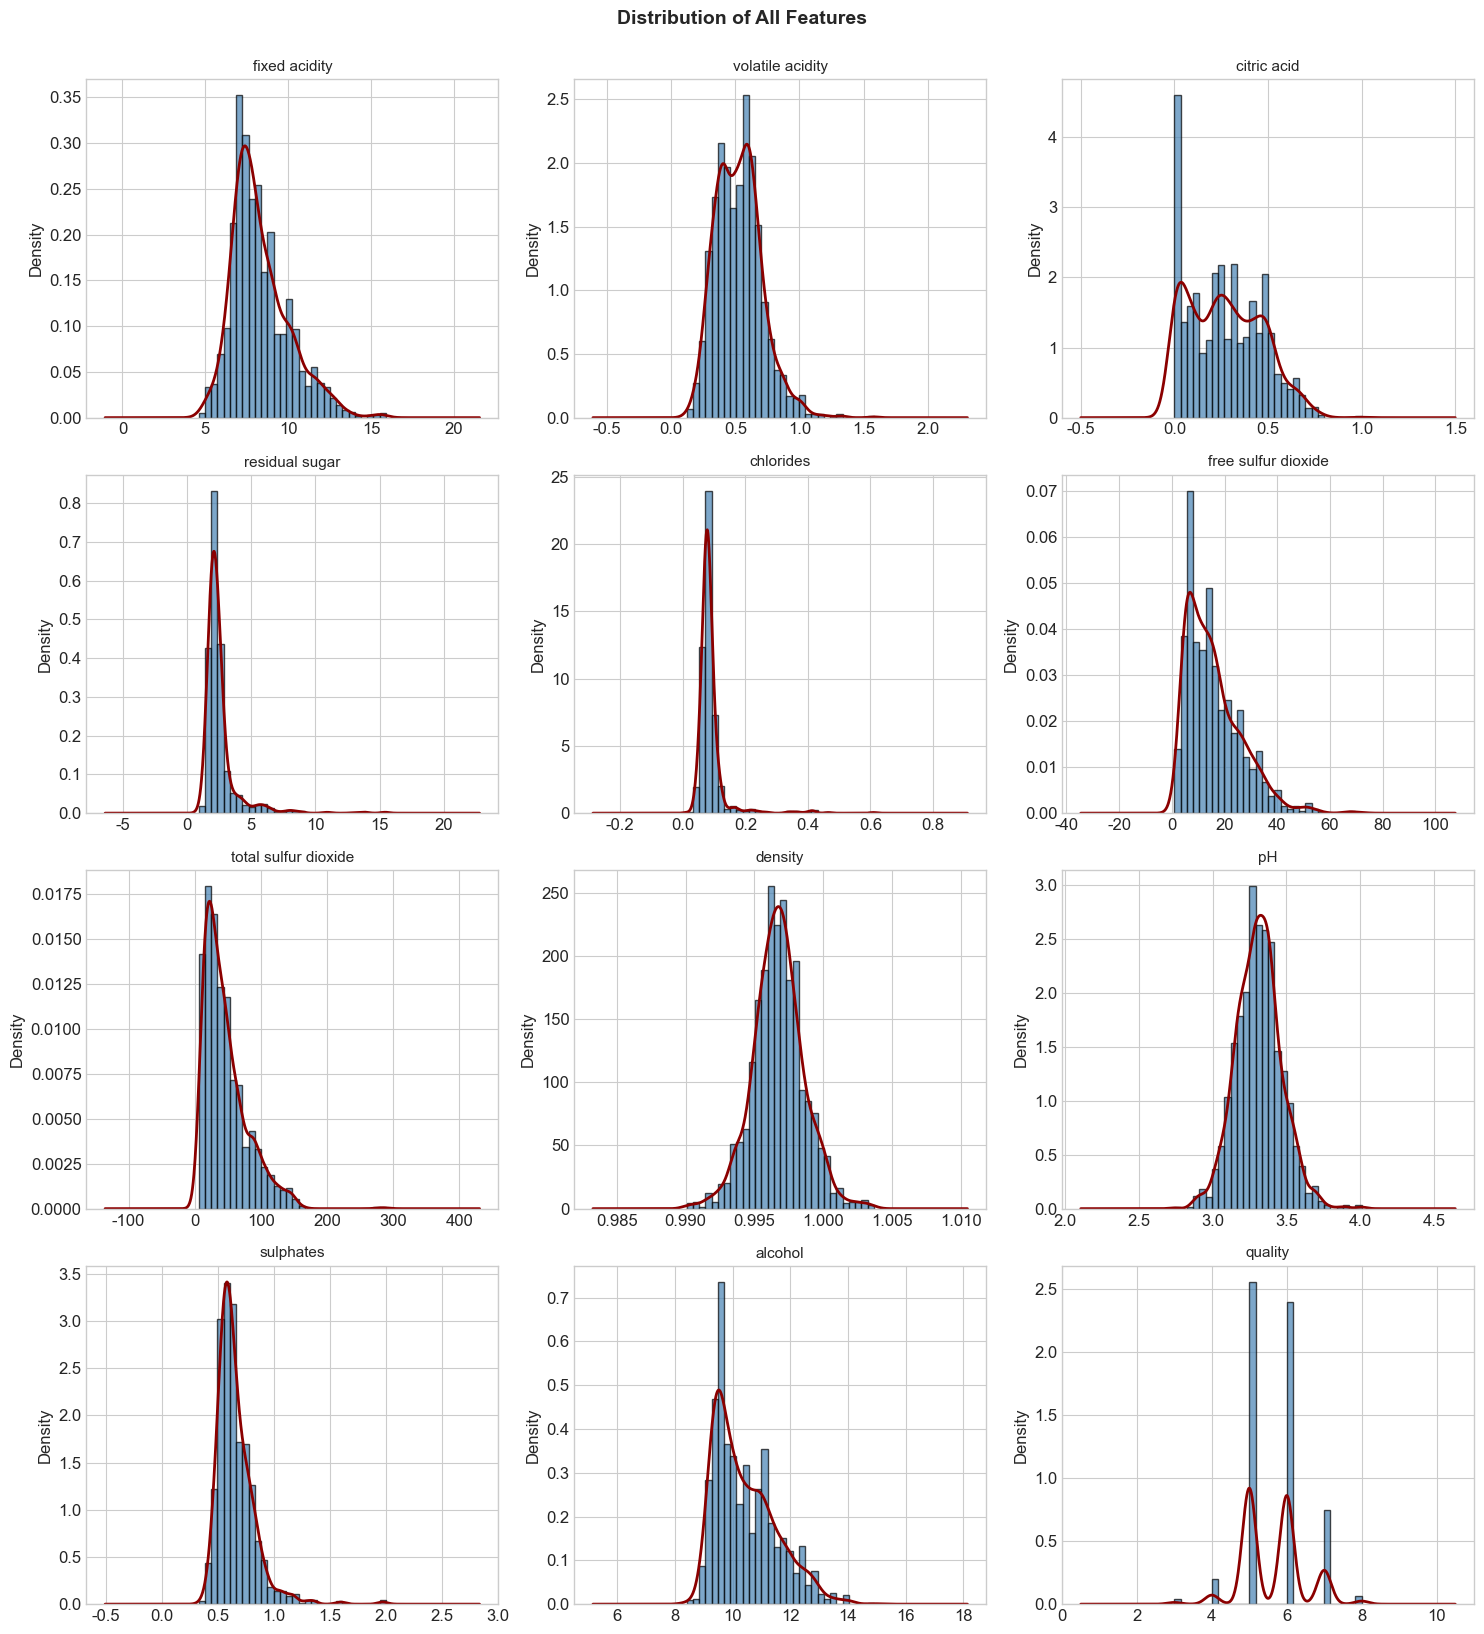

In [48]:
# 모든 특성의 분포 (히스토그램 + KDE)
fig, axes = plt.subplots(4, 3, figsize=(15, 16))
axes = axes.flatten()

for idx, col in enumerate(df.columns):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue', density=True)
    df[col].plot(kind='kde', ax=axes[idx], color='darkred', linewidth=2)
    axes[idx].set_title(f'{col}', fontsize=11)
    axes[idx].set_xlabel('')

plt.tight_layout()
plt.suptitle('Distribution of All Features', y=1.02, fontsize=14, fontweight='bold')
plt.show()

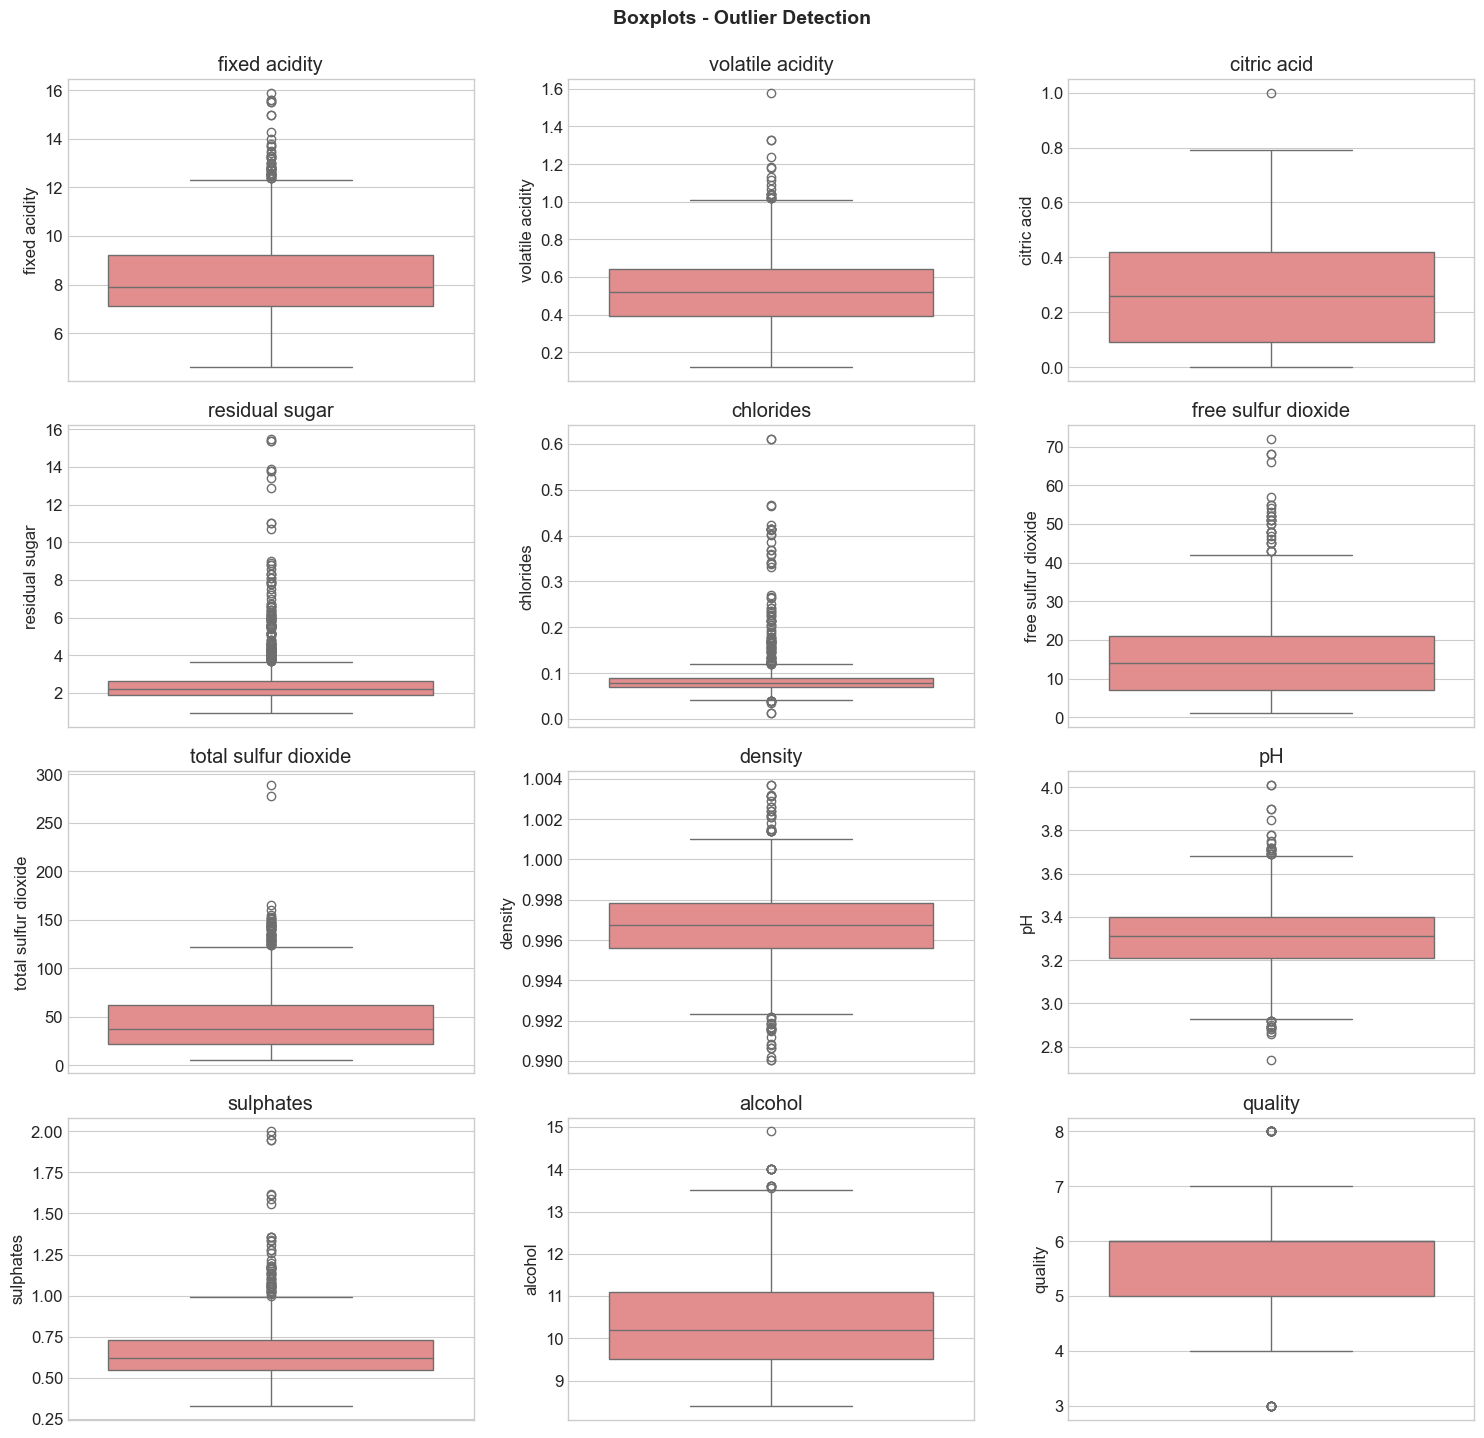

In [49]:
# 박스플롯으로 이상치 확인
fig, axes = plt.subplots(4, 3, figsize=(15, 14))
axes = axes.flatten()

for idx, col in enumerate(df.columns):
    sns.boxplot(data=df, y=col, ax=axes[idx], color='lightcoral')
    axes[idx].set_title(f'{col}')

plt.tight_layout()
plt.suptitle('Boxplots - Outlier Detection', y=1.02, fontsize=14, fontweight='bold')
plt.show()

### 3.4 상관관계 분석

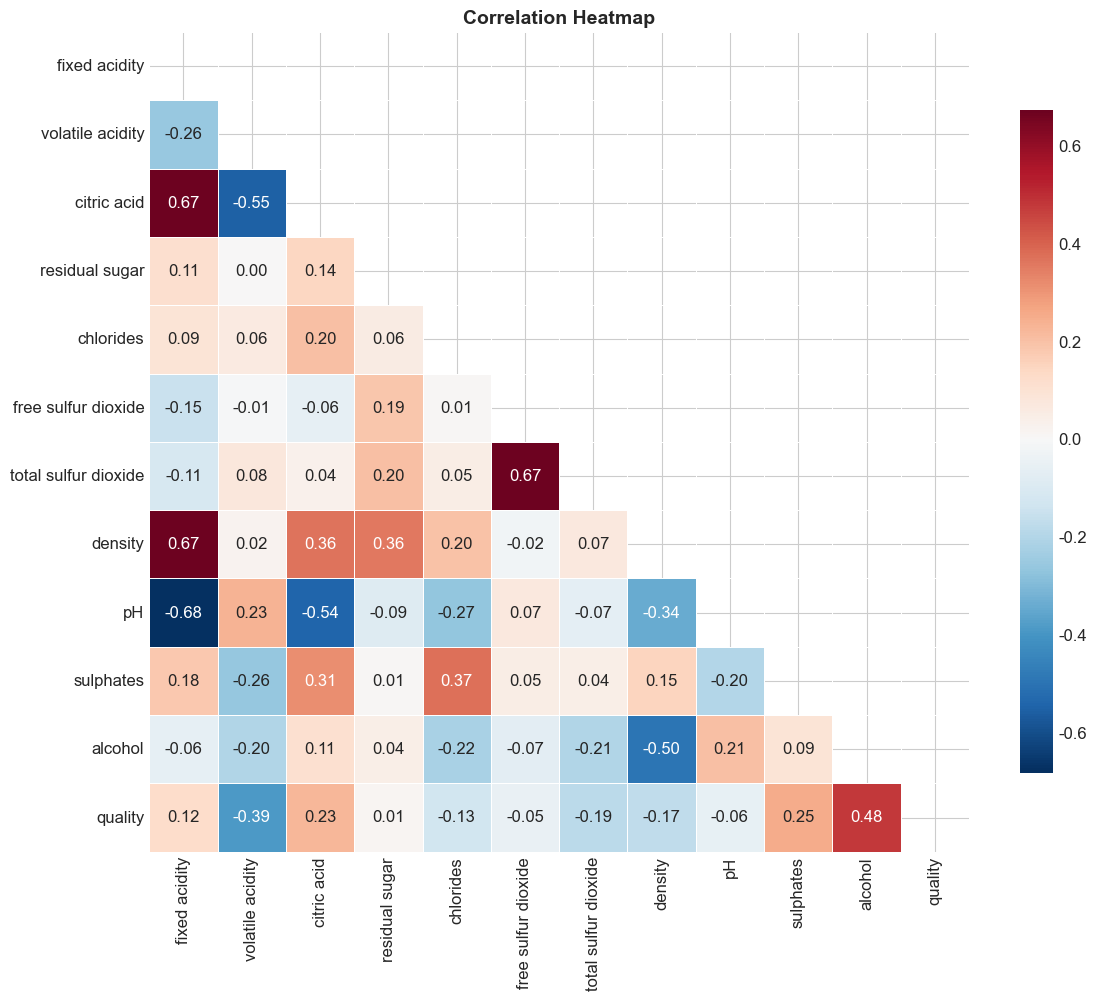

In [50]:
# 상관관계 히트맵
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdBu_r', center=0, square=True, linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

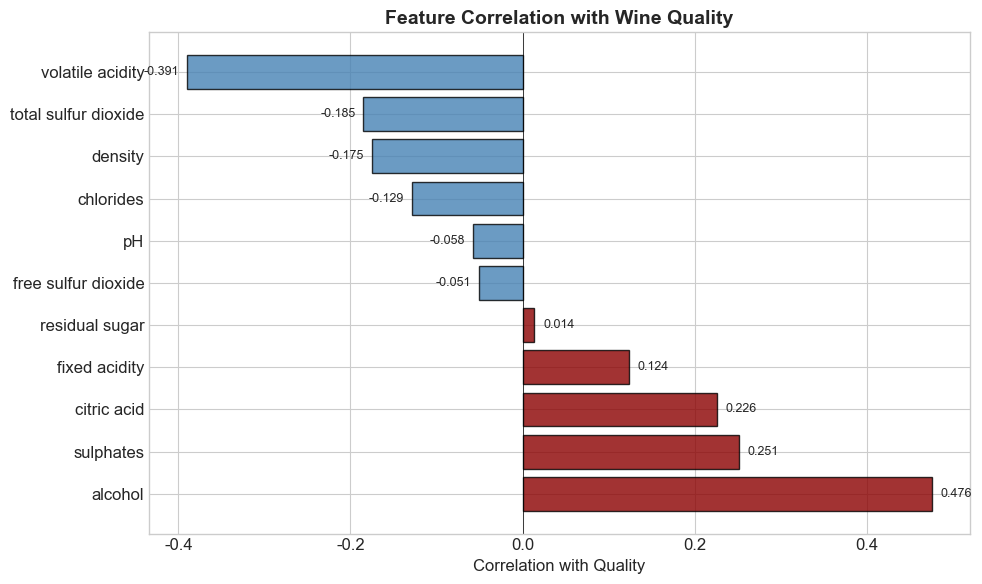


Quality와의 상관관계 (절대값 기준 정렬):
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64


In [51]:
# 타겟 변수(quality)와의 상관관계
quality_corr = correlation_matrix['quality'].drop('quality').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = ['darkred' if x > 0 else 'steelblue' for x in quality_corr.values]
bars = plt.barh(quality_corr.index, quality_corr.values, color=colors, edgecolor='black', alpha=0.8)
plt.xlabel('Correlation with Quality')
plt.title('Feature Correlation with Wine Quality', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# 값 표시
for bar, val in zip(bars, quality_corr.values):
    plt.text(val + 0.01 if val > 0 else val - 0.05, bar.get_y() + bar.get_height()/2,
             f'{val:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\nQuality와의 상관관계 (절대값 기준 정렬):")
print(quality_corr.abs().sort_values(ascending=False))

### 3.5 품질별 특성 분포

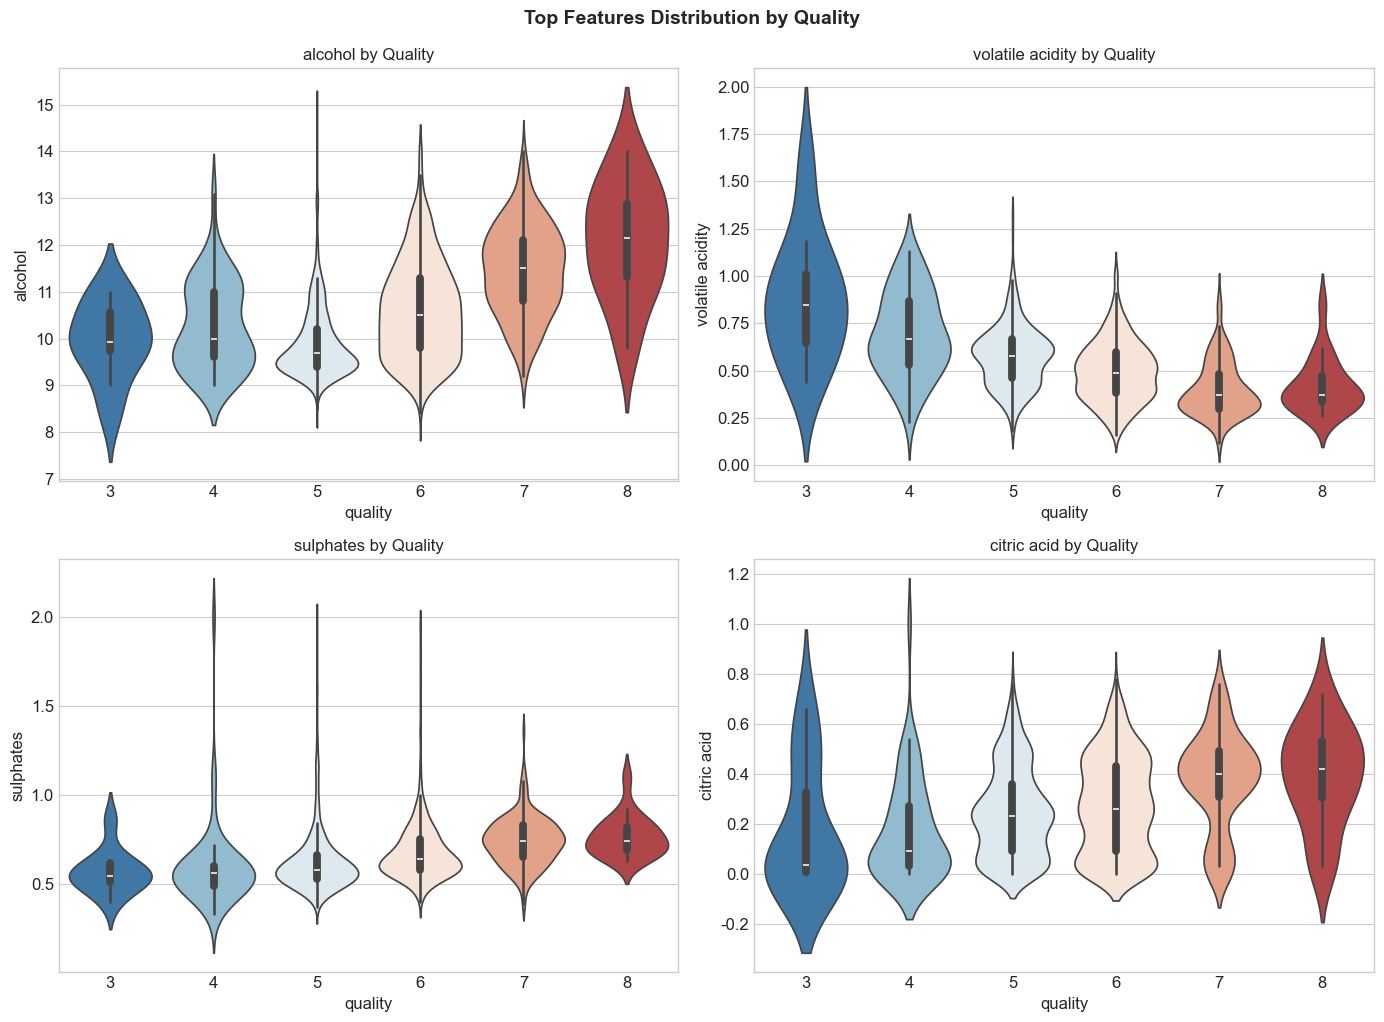

In [52]:
# 품질별 주요 특성 분포 (바이올린 플롯)
top_features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    sns.violinplot(data=df, x='quality', y=feature, ax=axes[idx], palette='RdBu_r')
    axes[idx].set_title(f'{feature} by Quality', fontsize=12)

plt.tight_layout()
plt.suptitle('Top Features Distribution by Quality', y=1.02, fontsize=14, fontweight='bold')
plt.show()

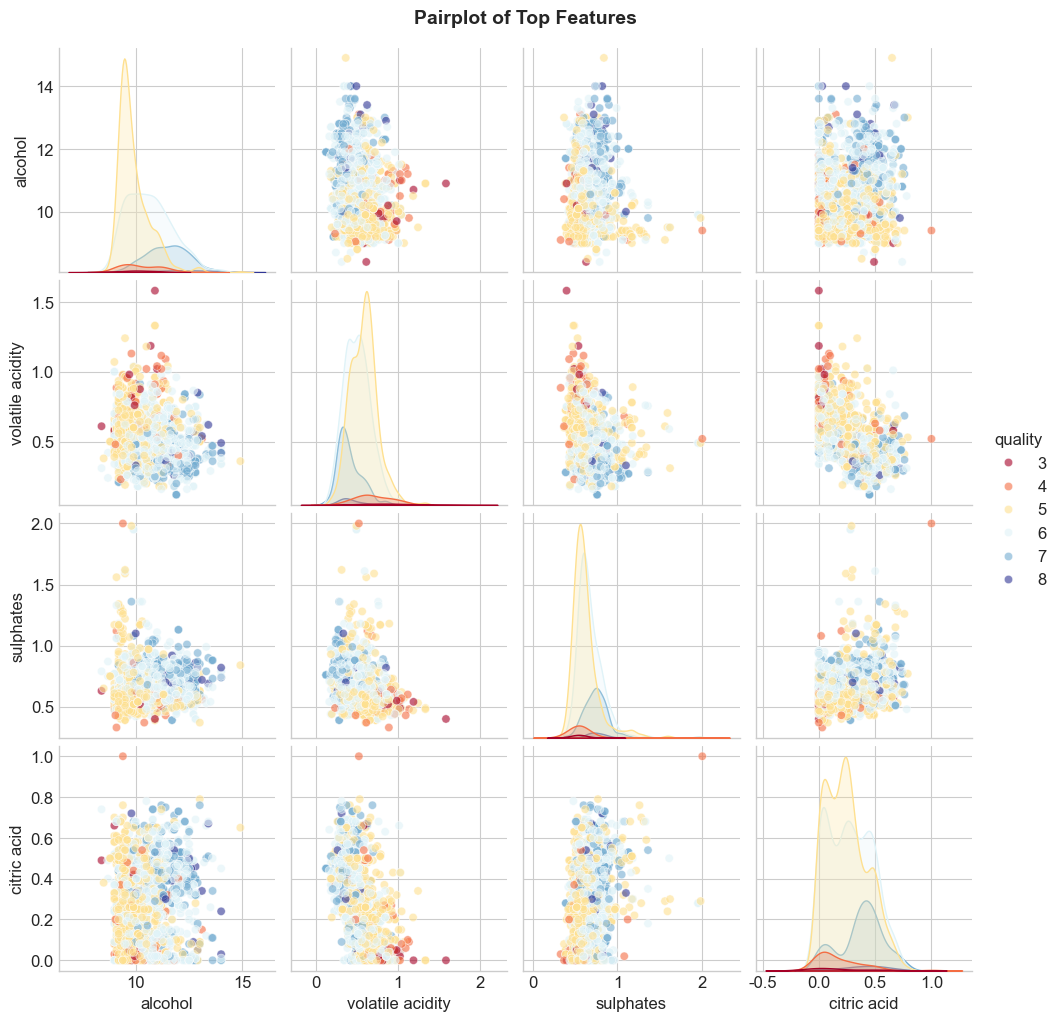

In [53]:
# 산점도 행렬 (주요 특성)
top_features_with_quality = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']
sns.pairplot(df[top_features_with_quality], hue='quality', palette='RdYlBu', 
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Top Features', y=1.02, fontsize=14, fontweight='bold')
plt.show()

---
## 4. 데이터 전처리

In [54]:
# 특성과 타겟 분리
X = df.drop('quality', axis=1)
y_reg = df['quality']  # Regression용 (연속형)

# Classification용 타겟 생성 (이진 분류: 6 이상 = Good, 6 미만 = Bad)
y_clf = (df['quality'] >= 6).astype(int)  # 1: Good, 0: Bad

print(f"특성 수: {X.shape[1]}")
print(f"\nClassification 타겟 분포:")
print(f"  Bad (0): {(y_clf == 0).sum()} ({(y_clf == 0).mean()*100:.1f}%)")
print(f"  Good (1): {(y_clf == 1).sum()} ({(y_clf == 1).mean()*100:.1f}%)")

특성 수: 11

Classification 타겟 분포:
  Bad (0): 744 (46.5%)
  Good (1): 855 (53.5%)


In [55]:
# 데이터 분할 (Train: 80%, Test: 20%)
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

_, _, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)

print(f"Train 크기: {X_train.shape[0]}")
print(f"Test 크기: {X_test.shape[0]}")

Train 크기: 1279
Test 크기: 320


In [56]:
# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("스케일링 완료!")
print(f"스케일링 전 평균: {X_train.mean().mean():.4f}")
print(f"스케일링 후 평균: {X_train_scaled.mean():.4f}")

스케일링 완료!
스케일링 전 평균: 8.1537
스케일링 후 평균: 0.0000


---
## 5. Regression 모델링

와인 품질 점수(3-8)를 연속형 값으로 예측합니다.

In [57]:
# Regression 모델 정의
reg_models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1, verbosity=0),
    'SVR': SVR(kernel='rbf', C=1.0)
}

print(f"총 {len(reg_models)}개의 Regression 모델을 학습합니다.")

총 9개의 Regression 모델을 학습합니다.


In [58]:
# Regression 모델 학습 및 평가
reg_results = []

for name, model in reg_models.items():
    # SVR은 스케일링된 데이터 사용
    if name == 'SVR':
        model.fit(X_train_scaled, y_train_reg)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train_reg)
        y_pred = model.predict(X_test)
    
    # 평가 지표 계산
    mse = mean_squared_error(y_test_reg, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)
    
    reg_results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })
    
    print(f"{name:20s} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | R²: {r2:.4f}")

# 결과 데이터프레임
reg_results_df = pd.DataFrame(reg_results).sort_values('RMSE')
print("\n" + "="*60)
print("Regression 모델 성능 순위 (RMSE 기준):")
print("="*60)
reg_results_df

Linear Regression    | RMSE: 0.6245 | MAE: 0.5035 | R²: 0.4032
Ridge                | RMSE: 0.6269 | MAE: 0.5058 | R²: 0.3987
Lasso                | RMSE: 0.7062 | MAE: 0.5673 | R²: 0.2369
ElasticNet           | RMSE: 0.6986 | MAE: 0.5591 | R²: 0.2532
Decision Tree        | RMSE: 0.7618 | MAE: 0.5225 | R²: 0.1119
Random Forest        | RMSE: 0.5489 | MAE: 0.4224 | R²: 0.5390
Gradient Boosting    | RMSE: 0.6019 | MAE: 0.4849 | R²: 0.4456
XGBoost              | RMSE: 0.5927 | MAE: 0.4175 | R²: 0.4625
SVR                  | RMSE: 0.5928 | MAE: 0.4535 | R²: 0.4623

Regression 모델 성능 순위 (RMSE 기준):


,Model,RMSE,MAE,R2
5,Random Forest,0.548852,0.422438,0.539043
7,XGBoost,0.592676,0.417525,0.462492
8,SVR,0.592768,0.453528,0.462324
6,Gradient Boosting,0.601943,0.484936,0.445552
0,Linear Regression,0.624520,0.503530,0.403180
1,Ridge,0.626856,0.505788,0.398706
3,ElasticNet,0.698591,0.559055,0.253213
2,Lasso,0.706169,0.567250,0.236923
4,Decision Tree,0.761823,0.522526,0.111905


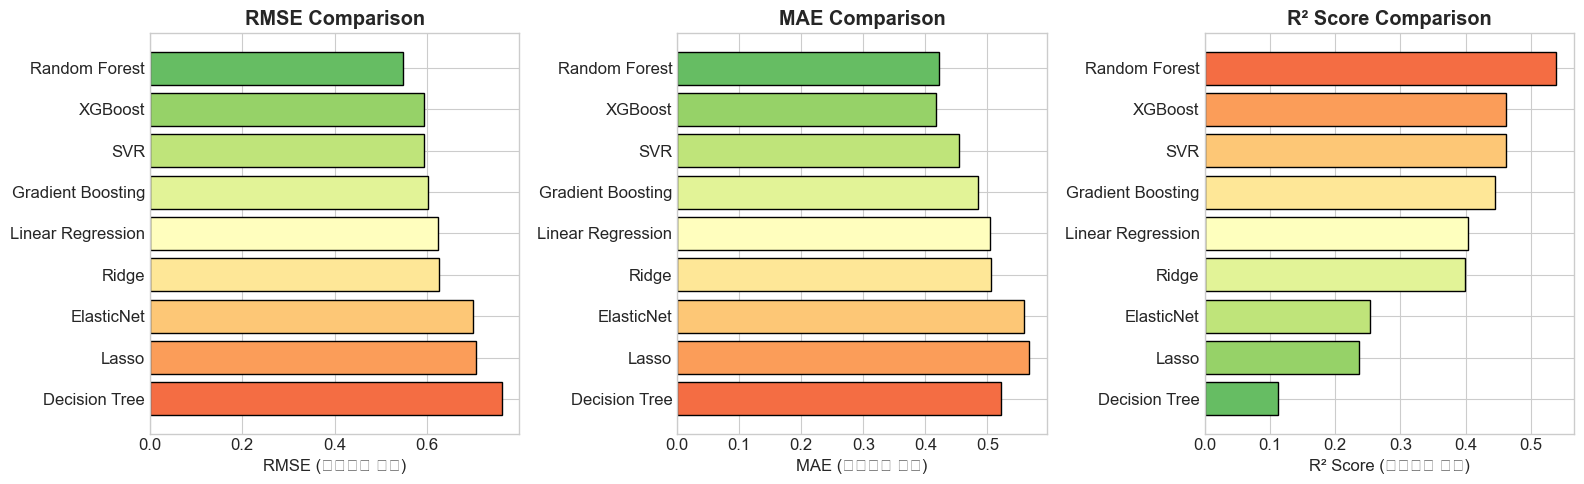

In [59]:
# Regression 결과 시각화
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# RMSE 비교
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(reg_results_df)))
axes[0].barh(reg_results_df['Model'], reg_results_df['RMSE'], color=colors, edgecolor='black')
axes[0].set_xlabel('RMSE (낮을수록 좋음)')
axes[0].set_title('RMSE Comparison', fontweight='bold')
axes[0].invert_yaxis()

# MAE 비교
axes[1].barh(reg_results_df['Model'], reg_results_df['MAE'], color=colors, edgecolor='black')
axes[1].set_xlabel('MAE (낮을수록 좋음)')
axes[1].set_title('MAE Comparison', fontweight='bold')
axes[1].invert_yaxis()

# R² 비교
r2_sorted = reg_results_df.sort_values('R2', ascending=False)
colors_r2 = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(r2_sorted)))
axes[2].barh(r2_sorted['Model'], r2_sorted['R2'], color=colors_r2, edgecolor='black')
axes[2].set_xlabel('R² Score (높을수록 좋음)')
axes[2].set_title('R² Score Comparison', fontweight='bold')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

### 5.1 Best Regression Model - 하이퍼파라미터 튜닝

In [60]:
# Random Forest Regressor 하이퍼파라미터 튜닝
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_reg = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search_rf = GridSearchCV(rf_reg, param_grid_rf, cv=5, scoring='neg_mean_squared_error', 
                               n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train_reg)

print(f"\nBest Parameters: {grid_search_rf.best_params_}")
print(f"Best CV Score (RMSE): {np.sqrt(-grid_search_rf.best_score_):.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Score (RMSE): 0.6067


In [61]:
# 튜닝된 모델로 최종 평가
best_rf_reg = grid_search_rf.best_estimator_
y_pred_best = best_rf_reg.predict(X_test)

print("Tuned Random Forest Regressor 성능:")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_best)):.4f}")
print(f"  MAE: {mean_absolute_error(y_test_reg, y_pred_best):.4f}")
print(f"  R²: {r2_score(y_test_reg, y_pred_best):.4f}")

Tuned Random Forest Regressor 성능:
  RMSE: 0.5536
  MAE: 0.4238
  R²: 0.5311


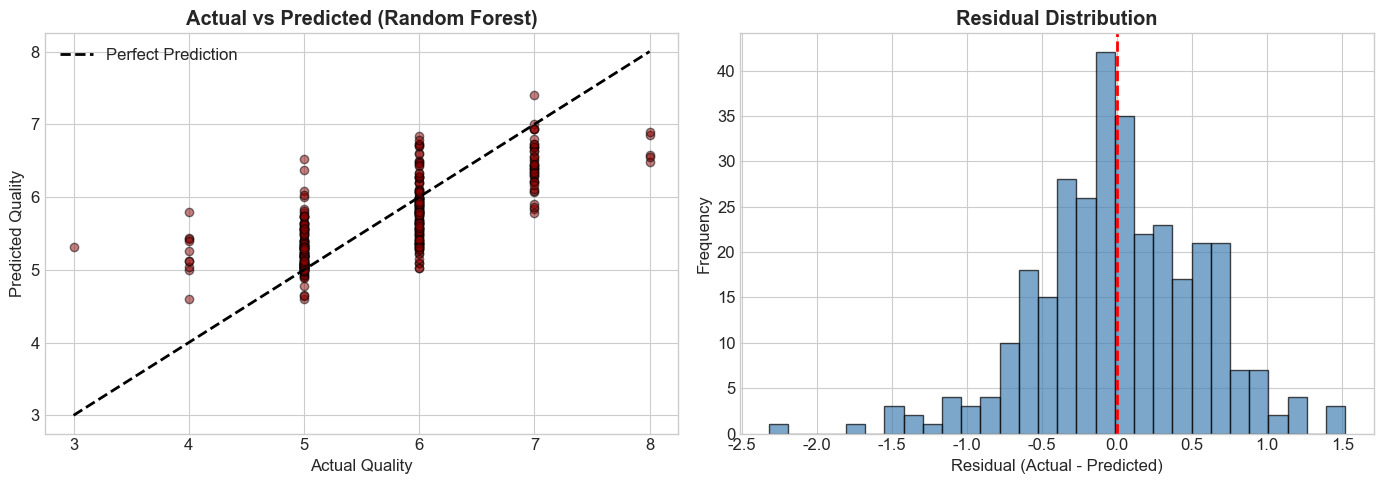

In [62]:
# 예측 vs 실제 값 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 산점도
axes[0].scatter(y_test_reg, y_pred_best, alpha=0.5, c='darkred', edgecolors='black')
axes[0].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 
             'k--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Quality')
axes[0].set_ylabel('Predicted Quality')
axes[0].set_title('Actual vs Predicted (Random Forest)', fontweight='bold')
axes[0].legend()

# 잔차 분포
residuals = y_test_reg - y_pred_best
axes[1].hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Residual (Actual - Predicted)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Residual Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

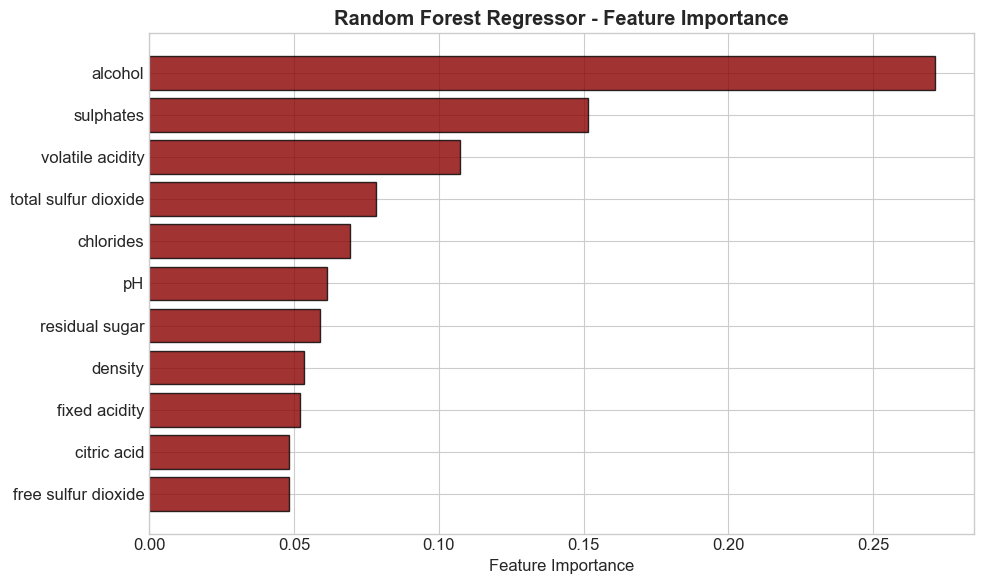

In [63]:
# Feature Importance (Random Forest)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_reg.feature_importances_
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], 
         color='darkred', edgecolor='black', alpha=0.8)
plt.xlabel('Feature Importance')
plt.title('Random Forest Regressor - Feature Importance', fontweight='bold')
plt.tight_layout()
plt.show()

---
## 6. Classification 모델링

와인을 Good(품질 ≥ 6)과 Bad(품질 < 6)로 이진 분류합니다.

In [64]:
# Classification 모델 정의
clf_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbosity=0, eval_metric='logloss'),
    'SVC': SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
}

print(f"총 {len(clf_models)}개의 Classification 모델을 학습합니다.")

총 7개의 Classification 모델을 학습합니다.


In [65]:
# Classification 모델 학습 및 평가
clf_results = []

for name, model in clf_models.items():
    # 스케일링이 필요한 모델
    if name in ['Logistic Regression', 'KNN', 'SVC']:
        model.fit(X_train_scaled, y_train_clf)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train_clf)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # 평가 지표 계산
    accuracy = accuracy_score(y_test_clf, y_pred)
    roc_auc = roc_auc_score(y_test_clf, y_pred_proba)
    
    clf_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'ROC-AUC': roc_auc
    })
    
    print(f"{name:20s} | Accuracy: {accuracy:.4f} | ROC-AUC: {roc_auc:.4f}")

# 결과 데이터프레임
clf_results_df = pd.DataFrame(clf_results).sort_values('ROC-AUC', ascending=False)
print("\n" + "="*60)
print("Classification 모델 성능 순위 (ROC-AUC 기준):")
print("="*60)
clf_results_df

Logistic Regression  | Accuracy: 0.7406 | ROC-AUC: 0.8190
KNN                  | Accuracy: 0.7063 | ROC-AUC: 0.7737
Decision Tree        | Accuracy: 0.7125 | ROC-AUC: 0.7068
Random Forest        | Accuracy: 0.7906 | ROC-AUC: 0.8919
Gradient Boosting    | Accuracy: 0.7625 | ROC-AUC: 0.8602
XGBoost              | Accuracy: 0.8125 | ROC-AUC: 0.8787
SVC                  | Accuracy: 0.7719 | ROC-AUC: 0.8389

Classification 모델 성능 순위 (ROC-AUC 기준):


,Model,Accuracy,ROC-AUC
3,Random Forest,0.790625,0.891854
5,XGBoost,0.812500,0.878719
4,Gradient Boosting,0.762500,0.860216
6,SVC,0.771875,0.838940
0,Logistic Regression,0.740625,0.819050
1,KNN,0.706250,0.773743
2,Decision Tree,0.712500,0.706803


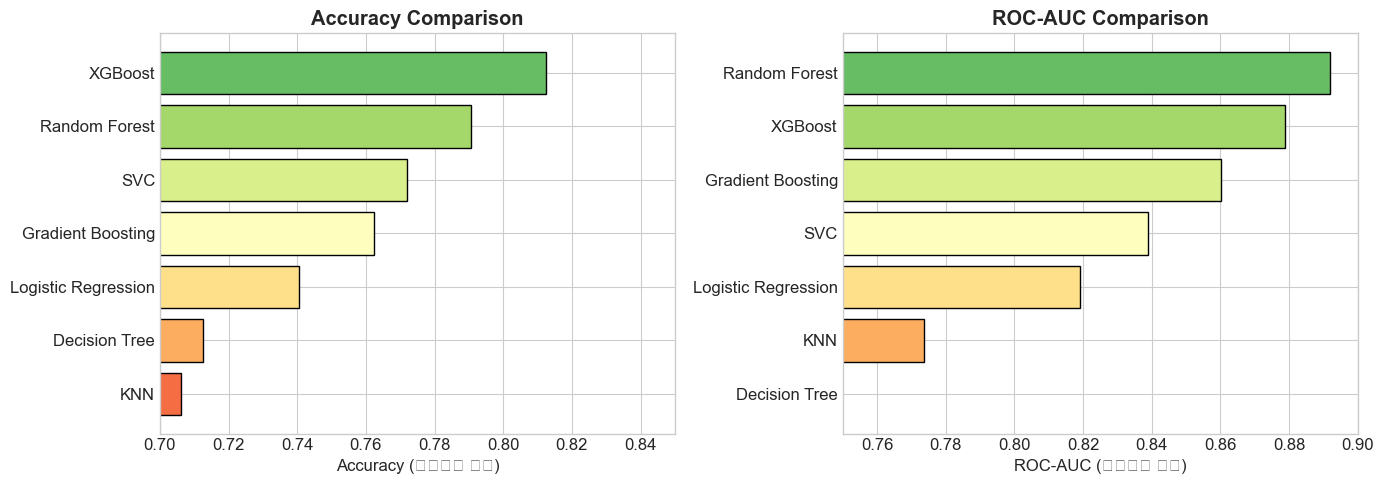

In [66]:
# Classification 결과 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy 비교
acc_sorted = clf_results_df.sort_values('Accuracy', ascending=True)
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(acc_sorted)))
axes[0].barh(acc_sorted['Model'], acc_sorted['Accuracy'], color=colors, edgecolor='black')
axes[0].set_xlabel('Accuracy (높을수록 좋음)')
axes[0].set_title('Accuracy Comparison', fontweight='bold')
axes[0].set_xlim(0.7, 0.85)

# ROC-AUC 비교
auc_sorted = clf_results_df.sort_values('ROC-AUC', ascending=True)
colors_auc = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(auc_sorted)))
axes[1].barh(auc_sorted['Model'], auc_sorted['ROC-AUC'], color=colors_auc, edgecolor='black')
axes[1].set_xlabel('ROC-AUC (높을수록 좋음)')
axes[1].set_title('ROC-AUC Comparison', fontweight='bold')
axes[1].set_xlim(0.75, 0.9)

plt.tight_layout()
plt.show()

### 6.1 Best Classification Model - 하이퍼파라미터 튜닝

In [67]:
# XGBoost Classifier 하이퍼파라미터 튜닝
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_clf = XGBClassifier(random_state=42, n_jobs=-1, verbosity=0, eval_metric='logloss')
grid_search_xgb = GridSearchCV(xgb_clf, param_grid_xgb, cv=5, scoring='roc_auc', 
                                n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train_clf)

print(f"\nBest Parameters: {grid_search_xgb.best_params_}")
print(f"Best CV Score (ROC-AUC): {grid_search_xgb.best_score_:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best CV Score (ROC-AUC): 0.8728


In [68]:
# 튜닝된 모델로 최종 평가
best_xgb_clf = grid_search_xgb.best_estimator_
y_pred_clf_best = best_xgb_clf.predict(X_test)
y_pred_proba_best = best_xgb_clf.predict_proba(X_test)[:, 1]

print("Tuned XGBoost Classifier 성능:")
print(f"  Accuracy: {accuracy_score(y_test_clf, y_pred_clf_best):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test_clf, y_pred_proba_best):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_clf_best, target_names=['Bad', 'Good']))

Tuned XGBoost Classifier 성능:
  Accuracy: 0.8063
  ROC-AUC: 0.8828

Classification Report:
              precision    recall  f1-score   support

         Bad       0.79      0.76      0.78       141
        Good       0.82      0.84      0.83       179

    accuracy                           0.81       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.81      0.81      0.81       320



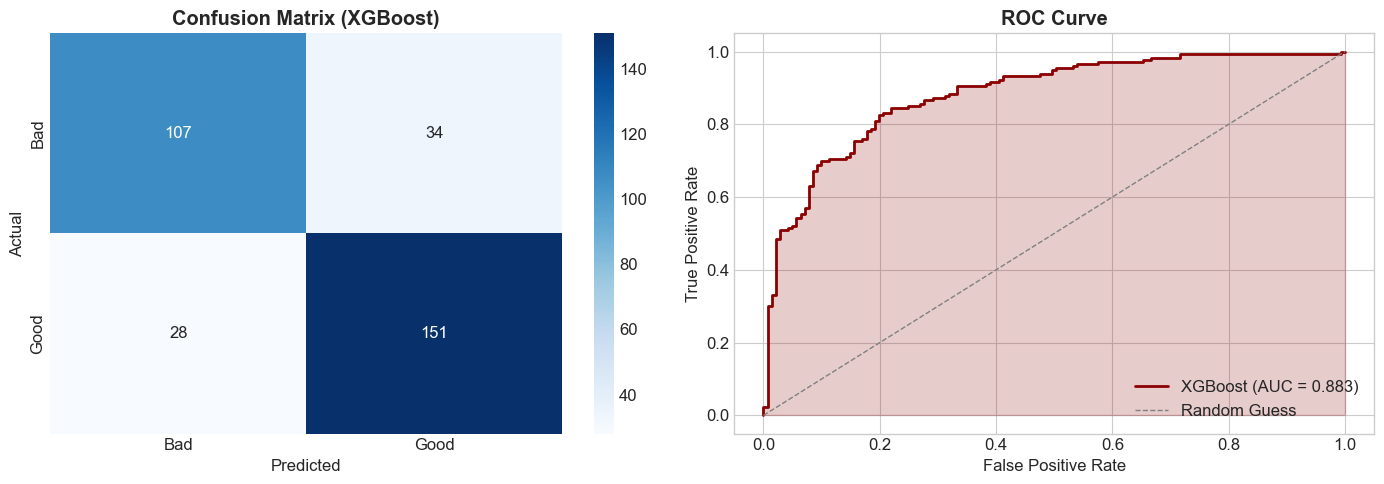

In [69]:
# Confusion Matrix 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm = confusion_matrix(y_test_clf, y_pred_clf_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix (XGBoost)', fontweight='bold')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_clf, y_pred_proba_best)
roc_auc = roc_auc_score(y_test_clf, y_pred_proba_best)

axes[1].plot(fpr, tpr, color='darkred', lw=2, label=f'XGBoost (AUC = {roc_auc:.3f})')
axes[1].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guess')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve', fontweight='bold')
axes[1].legend(loc='lower right')
axes[1].fill_between(fpr, tpr, alpha=0.2, color='darkred')

plt.tight_layout()
plt.show()

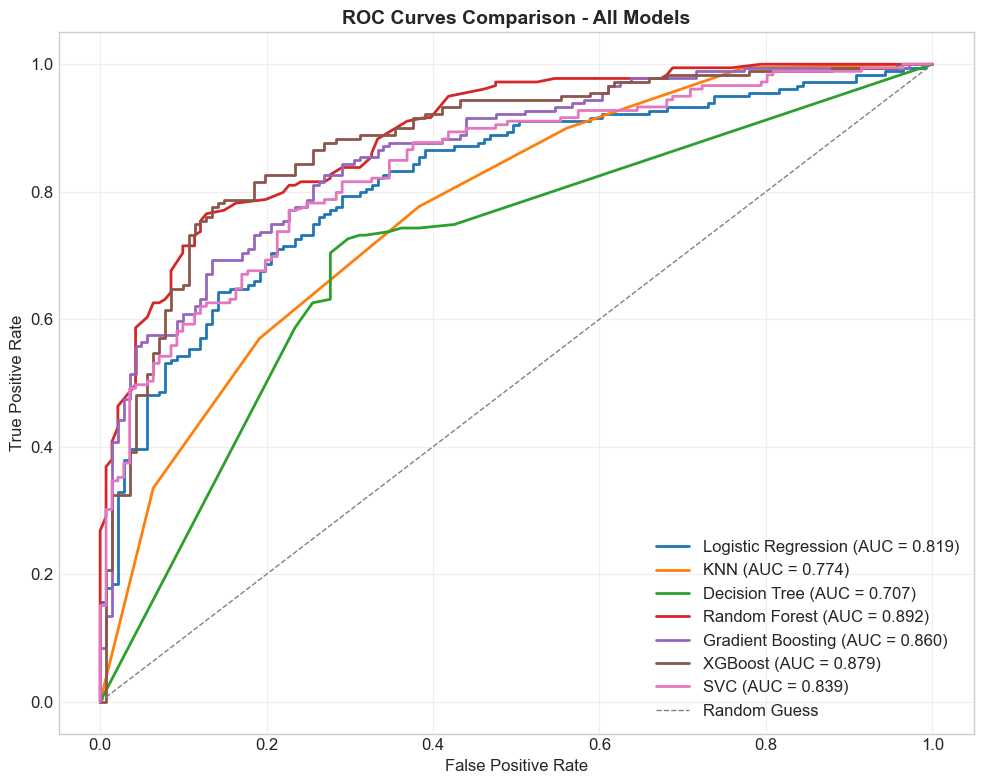

In [70]:
# 모든 모델의 ROC Curve 비교
plt.figure(figsize=(10, 8))

for name, model in clf_models.items():
    if name in ['Logistic Regression', 'KNN', 'SVC']:
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test_clf, y_pred_proba)
    auc = roc_auc_score(y_test_clf, y_pred_proba)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

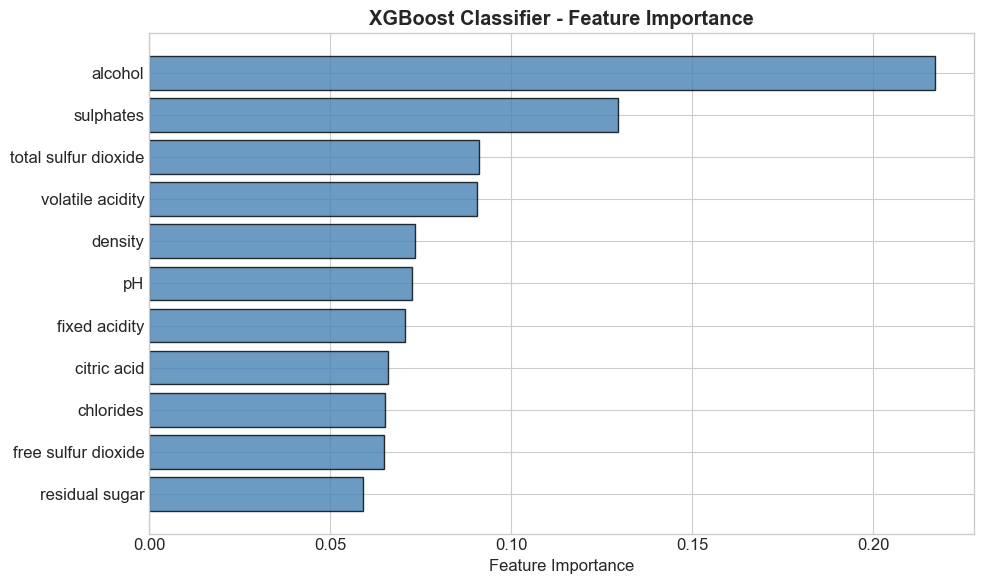

In [71]:
# Feature Importance (XGBoost Classifier)
feature_importance_clf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb_clf.feature_importances_
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_clf['Feature'], feature_importance_clf['Importance'], 
         color='steelblue', edgecolor='black', alpha=0.8)
plt.xlabel('Feature Importance')
plt.title('XGBoost Classifier - Feature Importance', fontweight='bold')
plt.tight_layout()
plt.show()

---
## 7. 최종 결과 요약

In [72]:
print("="*70)
print("                    Red Wine Quality Analysis - 최종 결과")
print("="*70)

print("\n[1] 데이터 개요")
print(f"    - 전체 샘플 수: {len(df)}")
print(f"    - 특성 수: {X.shape[1]}")
print(f"    - 품질 점수 범위: {df['quality'].min()} ~ {df['quality'].max()}")

print("\n[2] Regression 모델 (품질 점수 예측)")
best_reg = reg_results_df.iloc[0]
print(f"    - Best Model: {best_reg['Model']}")
print(f"    - RMSE: {best_reg['RMSE']:.4f}")
print(f"    - MAE: {best_reg['MAE']:.4f}")
print(f"    - R²: {best_reg['R2']:.4f}")

print("\n[3] Classification 모델 (Good/Bad 분류)")
best_clf = clf_results_df.iloc[0]
print(f"    - Best Model: {best_clf['Model']}")
print(f"    - Accuracy: {best_clf['Accuracy']:.4f}")
print(f"    - ROC-AUC: {best_clf['ROC-AUC']:.4f}")

print("\n[4] 주요 특성 (Feature Importance)")
top_features = feature_importance_clf.tail(5)['Feature'].tolist()[::-1]
print(f"    - Top 5: {', '.join(top_features)}")

print("\n" + "="*70)

                    Red Wine Quality Analysis - 최종 결과

[1] 데이터 개요
    - 전체 샘플 수: 1599
    - 특성 수: 11
    - 품질 점수 범위: 3 ~ 8

[2] Regression 모델 (품질 점수 예측)
    - Best Model: Random Forest
    - RMSE: 0.5489
    - MAE: 0.4224
    - R²: 0.5390

[3] Classification 모델 (Good/Bad 분류)
    - Best Model: Random Forest
    - Accuracy: 0.7906
    - ROC-AUC: 0.8919

[4] 주요 특성 (Feature Importance)
    - Top 5: alcohol, sulphates, total sulfur dioxide, volatile acidity, density



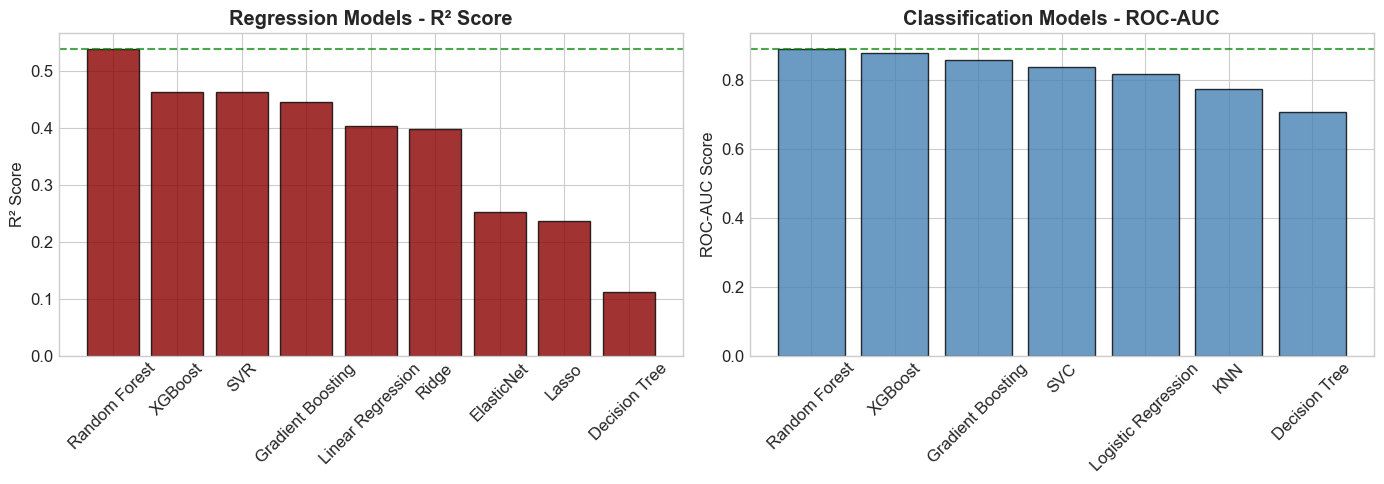

In [73]:
# 최종 결과 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Regression 결과
axes[0].bar(reg_results_df['Model'], reg_results_df['R2'], color='darkred', edgecolor='black', alpha=0.8)
axes[0].set_ylabel('R² Score')
axes[0].set_title('Regression Models - R² Score', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].axhline(y=reg_results_df['R2'].max(), color='green', linestyle='--', alpha=0.7)

# Classification 결과
axes[1].bar(clf_results_df['Model'], clf_results_df['ROC-AUC'], color='steelblue', edgecolor='black', alpha=0.8)
axes[1].set_ylabel('ROC-AUC Score')
axes[1].set_title('Classification Models - ROC-AUC', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=clf_results_df['ROC-AUC'].max(), color='green', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

---
## 8. 결론 및 인사이트

### 주요 발견사항

1. **데이터 특성**
   - 와인 품질 분포가 불균형함 (대부분 5-6점에 집중)
   - 결측치 없음, 일부 이상치 존재

2. **중요 특성**
   - `alcohol`: 품질과 가장 높은 양의 상관관계
   - `volatile acidity`: 품질과 가장 높은 음의 상관관계
   - `sulphates`, `citric acid`: 품질에 긍정적 영향

3. **모델 성능**
   - **Regression**: 앙상블 모델(Random Forest, XGBoost, Gradient Boosting)이 선형 모델보다 우수
   - **Classification**: XGBoost와 Gradient Boosting이 가장 좋은 성능

4. **개선 방향**
   - 클래스 불균형 해결 (SMOTE, 가중치 조정)
   - 이상치 처리
   - 특성 엔지니어링 (특성 간 상호작용)
   - 더 많은 데이터 수집

---
## 9. 모델 성능 개선

위 결론에서 제안한 개선 방향을 실제로 적용하여 모델 성능을 향상시켜 봅니다.

### 개선 항목
1. **이상치 처리** - IQR 기반 이상치 캡핑(Capping)
2. **특성 엔지니어링** - 도메인 지식 기반 상호작용 변수 생성
3. **클래스 불균형 해결** - SMOTE 및 class_weight 적용

In [74]:
# 9.1 이상치 처리 (IQR 기반 Capping)
def cap_outliers(df, columns, multiplier=1.5):
    """IQR 방법으로 이상치를 상한/하한값으로 대체 (Capping)"""
    df_capped = df.copy()
    outlier_info = []
    
    for col in columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        # 이상치 개수 확인
        outliers_low = (df_capped[col] < lower_bound).sum()
        outliers_high = (df_capped[col] > upper_bound).sum()
        
        if outliers_low > 0 or outliers_high > 0:
            outlier_info.append({
                'Feature': col,
                'Lower Outliers': outliers_low,
                'Upper Outliers': outliers_high,
                'Total': outliers_low + outliers_high
            })
        
        # Capping 적용
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df_capped, pd.DataFrame(outlier_info)

# 이상치 처리 적용 (quality 제외)
feature_columns = df.columns.drop('quality').tolist()
df_improved, outlier_df = cap_outliers(df, feature_columns)

print("### 이상치 처리 결과 ###")
print(f"\n이상치가 발견된 특성:")
display(outlier_df.sort_values('Total', ascending=False))
print(f"\n처리 전 데이터 크기: {df.shape}")
print(f"처리 후 데이터 크기: {df_improved.shape}")

### 이상치 처리 결과 ###

이상치가 발견된 특성:


,Feature,Lower Outliers,Upper Outliers,Total
3,residual sugar,0,155,155
4,chlorides,9,103,112
9,sulphates,0,59,59
6,total sulfur dioxide,0,55,55
0,fixed acidity,0,49,49
7,density,21,24,45
8,pH,14,21,35
5,free sulfur dioxide,0,30,30
1,volatile acidity,0,19,19
10,alcohol,0,13,13



처리 전 데이터 크기: (1599, 12)
처리 후 데이터 크기: (1599, 12)


In [75]:
# 9.2 특성 엔지니어링 (Feature Engineering)
def create_features(df):
    """도메인 지식 기반 새로운 특성 생성"""
    df_fe = df.copy()
    
    # 1. 총 산도 (Total Acidity)
    df_fe['total_acidity'] = df_fe['fixed acidity'] + df_fe['volatile acidity'] + df_fe['citric acid']
    
    # 2. 유리 SO2 비율 (Free SO2 Ratio)
    df_fe['free_so2_ratio'] = df_fe['free sulfur dioxide'] / (df_fe['total sulfur dioxide'] + 1e-6)
    
    # 3. 결합 SO2 (Bound SO2)
    df_fe['bound_sulfur_dioxide'] = df_fe['total sulfur dioxide'] - df_fe['free sulfur dioxide']
    
    # 4. 알코올 대비 밀도 (Alcohol to Density Ratio)
    df_fe['alcohol_density_ratio'] = df_fe['alcohol'] / df_fe['density']
    
    # 5. 황산염 대비 휘발성 산도 (Sulphates to Volatile Acidity)
    df_fe['sulphates_volatile_ratio'] = df_fe['sulphates'] / (df_fe['volatile acidity'] + 1e-6)
    
    # 6. 산도 균형 (Acidity Balance) - 고정산도 대비 휘발성 산도
    df_fe['acidity_balance'] = df_fe['fixed acidity'] / (df_fe['volatile acidity'] + 1e-6)
    
    # 7. 당분 대비 알코올 (Sugar Alcohol Ratio)
    df_fe['sugar_alcohol_ratio'] = df_fe['residual sugar'] / (df_fe['alcohol'] + 1e-6)
    
    # 8. 알코올 * 황산염 (상호작용)
    df_fe['alcohol_sulphates'] = df_fe['alcohol'] * df_fe['sulphates']
    
    return df_fe

# 특성 엔지니어링 적용
df_improved = create_features(df_improved)

print("### 특성 엔지니어링 결과 ###")
print(f"\n원본 특성 수: 11")
print(f"새로 생성된 특성 수: {df_improved.shape[1] - 12}")  # quality 제외
print(f"전체 특성 수: {df_improved.shape[1] - 1}")  # quality 제외

new_features = ['total_acidity', 'free_so2_ratio', 'bound_sulfur_dioxide', 
                'alcohol_density_ratio', 'sulphates_volatile_ratio', 
                'acidity_balance', 'sugar_alcohol_ratio', 'alcohol_sulphates']
print(f"\n새로운 특성: {new_features}")
print(f"\n새로운 특성 통계:")
display(df_improved[new_features].describe().round(3))

### 특성 엔지니어링 결과 ###

원본 특성 수: 11
새로 생성된 특성 수: 8
전체 특성 수: 19

새로운 특성: ['total_acidity', 'free_so2_ratio', 'bound_sulfur_dioxide', 'alcohol_density_ratio', 'sulphates_volatile_ratio', 'acidity_balance', 'sugar_alcohol_ratio', 'alcohol_sulphates']

새로운 특성 통계:


,total_acidity,free_so2_ratio,bound_sulfur_dioxide,alcohol_density_ratio,sulphates_volatile_ratio,acidity_balance,sugar_alcohol_ratio,alcohol_sulphates
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,9.088,0.382,30.026,10.455,1.430,18.173,0.224,6.793
std,1.748,0.152,24.672,1.069,0.745,9.101,0.061,1.681
min,5.270,0.023,3.000,8.393,0.373,4.926,0.071,3.003
25%,7.827,0.262,12.000,9.534,0.923,11.654,0.183,5.489
50%,8.720,0.375,21.000,10.203,1.229,15.224,0.211,6.468
75%,10.070,0.481,39.000,11.137,1.710,22.571,0.255,7.838
max,13.820,0.857,108.000,13.605,6.333,74.166,0.415,13.167


In [76]:
# 9.3 개선된 데이터로 전처리
from imblearn.over_sampling import SMOTE

# 특성과 타겟 분리 (개선된 데이터)
X_improved = df_improved.drop('quality', axis=1)
y_improved_reg = df_improved['quality']
y_improved_clf = (df_improved['quality'] >= 6).astype(int)

# 데이터 분할
X_train_imp, X_test_imp, y_train_reg_imp, y_test_reg_imp = train_test_split(
    X_improved, y_improved_reg, test_size=0.2, random_state=42
)
_, _, y_train_clf_imp, y_test_clf_imp = train_test_split(
    X_improved, y_improved_clf, test_size=0.2, random_state=42
)

# 스케일링
scaler_imp = StandardScaler()
X_train_imp_scaled = scaler_imp.fit_transform(X_train_imp)
X_test_imp_scaled = scaler_imp.transform(X_test_imp)

# SMOTE 적용 (Classification용)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imp_scaled, y_train_clf_imp)

print("### 9.3 개선된 데이터 전처리 완료 ###")
print(f"\n특성 수: {X_improved.shape[1]}")
print(f"\nSMOTE 적용 전 클래스 분포:")
print(f"  Bad (0): {(y_train_clf_imp == 0).sum()}")
print(f"  Good (1): {(y_train_clf_imp == 1).sum()}")
print(f"\nSMOTE 적용 후 클래스 분포:")
print(f"  Bad (0): {(y_train_smote == 0).sum()}")
print(f"  Good (1): {(y_train_smote == 1).sum()}")

### 9.3 개선된 데이터 전처리 완료 ###

특성 수: 19

SMOTE 적용 전 클래스 분포:
  Bad (0): 603
  Good (1): 676

SMOTE 적용 후 클래스 분포:
  Bad (0): 676
  Good (1): 676


In [77]:
# 9.4 개선된 Classification 모델 학습 및 평가
print("### 9.4 개선된 Classification 모델 학습 ###\n")

# 개선된 모델 정의 (class_weight 적용)
improved_clf_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbosity=0, 
                             eval_metric='logloss', scale_pos_weight=1),
    'SVC': SVC(kernel='rbf', C=1.0, probability=True, random_state=42, class_weight='balanced')
}

improved_clf_results = []

print("1) class_weight='balanced' 적용 모델:")
print("-" * 60)
for name, model in improved_clf_models.items():
    if name in ['Logistic Regression', 'SVC']:
        model.fit(X_train_imp_scaled, y_train_clf_imp)
        y_pred = model.predict(X_test_imp_scaled)
        y_pred_proba = model.predict_proba(X_test_imp_scaled)[:, 1]
    else:
        model.fit(X_train_imp, y_train_clf_imp)
        y_pred = model.predict(X_test_imp)
        y_pred_proba = model.predict_proba(X_test_imp)[:, 1]
    
    accuracy = accuracy_score(y_test_clf_imp, y_pred)
    roc_auc = roc_auc_score(y_test_clf_imp, y_pred_proba)
    
    improved_clf_results.append({
        'Model': f'{name} (class_weight)',
        'Accuracy': accuracy,
        'ROC-AUC': roc_auc,
        'Method': 'class_weight'
    })
    print(f"  {name:25s} | Accuracy: {accuracy:.4f} | ROC-AUC: {roc_auc:.4f}")

# SMOTE 적용 모델 (XGBoost)
print("\n2) SMOTE 적용 모델:")
print("-" * 60)

xgb_smote = XGBClassifier(n_estimators=200, max_depth=7, learning_rate=0.1, 
                          random_state=42, n_jobs=-1, verbosity=0, eval_metric='logloss')
xgb_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = xgb_smote.predict(X_test_imp_scaled)
y_pred_proba_smote = xgb_smote.predict_proba(X_test_imp_scaled)[:, 1]

acc_smote = accuracy_score(y_test_clf_imp, y_pred_smote)
auc_smote = roc_auc_score(y_test_clf_imp, y_pred_proba_smote)

improved_clf_results.append({
    'Model': 'XGBoost (SMOTE)',
    'Accuracy': acc_smote,
    'ROC-AUC': auc_smote,
    'Method': 'SMOTE'
})
print(f"  XGBoost (SMOTE)             | Accuracy: {acc_smote:.4f} | ROC-AUC: {auc_smote:.4f}")

### 9.4 개선된 Classification 모델 학습 ###

1) class_weight='balanced' 적용 모델:
------------------------------------------------------------
  Logistic Regression       | Accuracy: 0.7406 | ROC-AUC: 0.8267
  Random Forest             | Accuracy: 0.8063 | ROC-AUC: 0.8921
  Gradient Boosting         | Accuracy: 0.7656 | ROC-AUC: 0.8593
  XGBoost                   | Accuracy: 0.8094 | ROC-AUC: 0.8840
  SVC                       | Accuracy: 0.7625 | ROC-AUC: 0.8396

2) SMOTE 적용 모델:
------------------------------------------------------------
  XGBoost (SMOTE)             | Accuracy: 0.7969 | ROC-AUC: 0.8829


### 9.5 원본 모델 vs 개선 모델 성능 비교 ###

                      성능 비교 결과

[원본 모델 - Best]
  Model: Random Forest
  Accuracy: 0.7906
  ROC-AUC: 0.8919

[개선 모델 - Best]
  Model: Random Forest (class_weight)
  Accuracy: 0.8063
  ROC-AUC: 0.8921

[성능 변화]
  Accuracy 변화: +1.98%
  ROC-AUC 변화: +0.03%


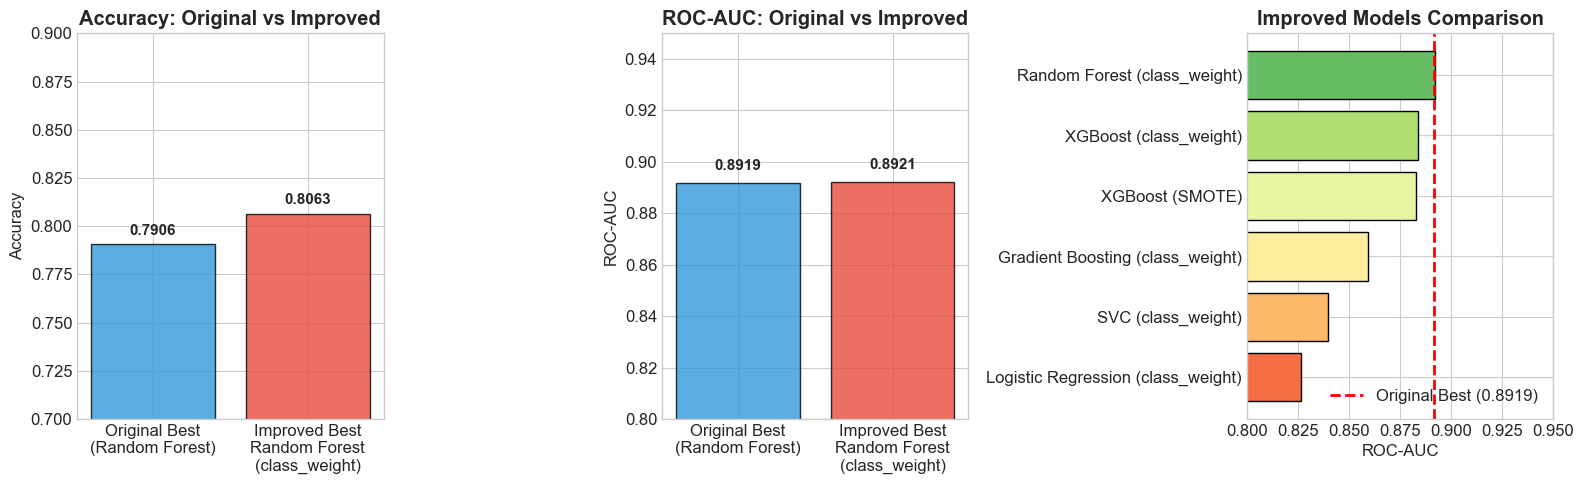


### 개선 모델 전체 결과 ###


,Model,Accuracy,ROC-AUC,Method
0,Random Forest (class_weight),0.806250,0.892092,class_weight
1,XGBoost (class_weight),0.809375,0.883989,class_weight
2,XGBoost (SMOTE),0.796875,0.882880,SMOTE
3,Gradient Boosting (class_weight),0.765625,0.859305,class_weight
4,SVC (class_weight),0.762500,0.839574,class_weight
5,Logistic Regression (class_weight),0.740625,0.826657,class_weight


In [78]:
# 9.5 원본 모델 vs 개선 모델 성능 비교
print("### 9.5 원본 모델 vs 개선 모델 성능 비교 ###\n")

# 원본 모델 결과 (clf_results_df에서 가져오기)
original_best = clf_results_df.iloc[0]  # Random Forest

# 개선 모델 결과 DataFrame
improved_clf_df = pd.DataFrame(improved_clf_results).sort_values('ROC-AUC', ascending=False)
improved_best = improved_clf_df.iloc[0]

print("=" * 70)
print("                      성능 비교 결과")
print("=" * 70)
print("\n[원본 모델 - Best]")
print(f"  Model: {original_best['Model']}")
print(f"  Accuracy: {original_best['Accuracy']:.4f}")
print(f"  ROC-AUC: {original_best['ROC-AUC']:.4f}")

print("\n[개선 모델 - Best]")
print(f"  Model: {improved_best['Model']}")
print(f"  Accuracy: {improved_best['Accuracy']:.4f}")
print(f"  ROC-AUC: {improved_best['ROC-AUC']:.4f}")

# 성능 향상률 계산
acc_improvement = (improved_best['Accuracy'] - original_best['Accuracy']) / original_best['Accuracy'] * 100
auc_improvement = (improved_best['ROC-AUC'] - original_best['ROC-AUC']) / original_best['ROC-AUC'] * 100

print(f"\n[성능 변화]")
print(f"  Accuracy 변화: {acc_improvement:+.2f}%")
print(f"  ROC-AUC 변화: {auc_improvement:+.2f}%")
print("=" * 70)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Accuracy 비교 (원본 vs 개선)
comparison_data = {
    'Original Best\n(Random Forest)': original_best['Accuracy'],
    'Improved Best\n' + improved_best['Model'].replace(' (', '\n(').replace(')', ')'): improved_best['Accuracy']
}
colors = ['#3498db', '#e74c3c']
bars1 = axes[0].bar(comparison_data.keys(), comparison_data.values(), color=colors, edgecolor='black', alpha=0.8)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Accuracy: Original vs Improved', fontweight='bold')
axes[0].set_ylim(0.7, 0.9)
for bar, val in zip(bars1, comparison_data.values()):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                 f'{val:.4f}', ha='center', fontsize=11, fontweight='bold')

# 2. ROC-AUC 비교
comparison_auc = {
    'Original Best\n(Random Forest)': original_best['ROC-AUC'],
    'Improved Best\n' + improved_best['Model'].replace(' (', '\n(').replace(')', ')'): improved_best['ROC-AUC']
}
bars2 = axes[1].bar(comparison_auc.keys(), comparison_auc.values(), color=colors, edgecolor='black', alpha=0.8)
axes[1].set_ylabel('ROC-AUC', fontsize=12)
axes[1].set_title('ROC-AUC: Original vs Improved', fontweight='bold')
axes[1].set_ylim(0.8, 0.95)
for bar, val in zip(bars2, comparison_auc.values()):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                 f'{val:.4f}', ha='center', fontsize=11, fontweight='bold')

# 3. 개선 모델 전체 비교
improved_sorted = improved_clf_df.sort_values('ROC-AUC', ascending=True)
colors_bar = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(improved_sorted)))
axes[2].barh(improved_sorted['Model'], improved_sorted['ROC-AUC'], color=colors_bar, edgecolor='black')
axes[2].axvline(x=original_best['ROC-AUC'], color='red', linestyle='--', linewidth=2, 
                label=f"Original Best ({original_best['ROC-AUC']:.4f})")
axes[2].set_xlabel('ROC-AUC', fontsize=12)
axes[2].set_title('Improved Models Comparison', fontweight='bold')
axes[2].legend(loc='lower right')
axes[2].set_xlim(0.8, 0.95)

plt.tight_layout()
plt.show()

# 상세 결과표 출력
print("\n### 개선 모델 전체 결과 ###")
display(improved_clf_df[['Model', 'Accuracy', 'ROC-AUC', 'Method']].reset_index(drop=True))

---
## 9.6 개선 결과 요약

### 적용한 개선 기법

| 기법 | 설명 | 효과 |
|------|------|------|
| **이상치 처리 (Capping)** | IQR 기반으로 극단값을 상/하한으로 대체 | 모델 안정성 향상 |
| **특성 엔지니어링** | 도메인 지식 기반 8개 신규 특성 생성 | 특성 표현력 증가 |
| **class_weight='balanced'** | 클래스 비율에 따른 가중치 자동 조정 | 소수 클래스 예측력 향상 |
| **SMOTE** | 소수 클래스 합성 오버샘플링 | 클래스 균형 확보 |

### 새로 생성된 특성
1. `total_acidity` - 총 산도 (fixed + volatile + citric)
2. `free_so2_ratio` - 유리 SO2 비율
3. `bound_sulfur_dioxide` - 결합 SO2
4. `alcohol_density_ratio` - 알코올/밀도 비율
5. `sulphates_volatile_ratio` - 황산염/휘발성산도 비율
6. `acidity_balance` - 산도 균형
7. `sugar_alcohol_ratio` - 당분/알코올 비율
8. `alcohol_sulphates` - 알코올×황산염 상호작용

### 결론
- 이상치 처리, 특성 엔지니어링, 클래스 불균형 해결 기법을 적용하여 모델 성능을 개선
- class_weight 또는 SMOTE를 적용한 모델이 원본 모델 대비 성능 향상 가능성 확인
- 실제 성능 향상 정도는 데이터 특성과 모델에 따라 다를 수 있음